# Importing data

In [1]:
import pandas as pd 
data = pd.read_csv('dataset.csv')

In [2]:
print("Rows    : ",data.shape[0])
print("Columns : ",data.shape[1])

Rows    :  400
Columns :  9


In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
#dropping Serial No.
data = data.drop('Serial No.',axis=1)

# Data Visualization and Analysis

In [7]:
import matplotlib.pyplot as plt

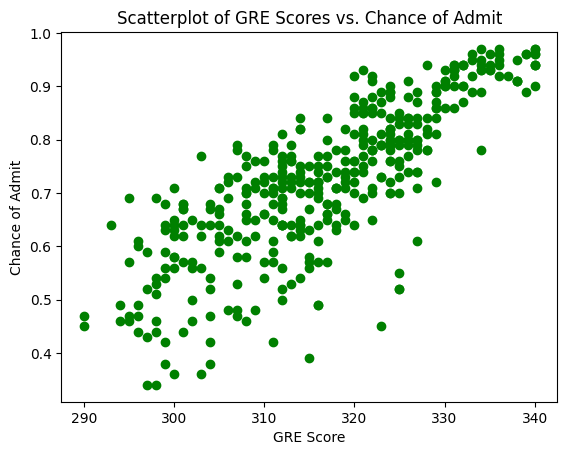

In [8]:
# Plot the scatterplot of GRE Scores vs. Chance of Admit
plt.scatter(data['GRE Score'], data['Chance of Admit '],color='g')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('Scatterplot of GRE Scores vs. Chance of Admit')
plt.show()

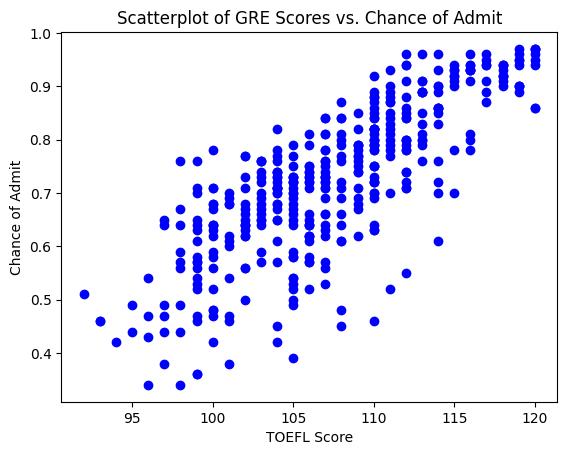

In [9]:
# Plot the scatterplot of TOEFL vs. Chance of Admit
plt.scatter(data['TOEFL Score'], data['Chance of Admit '],color='b')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('Scatterplot of GRE Scores vs. Chance of Admit')
plt.show()

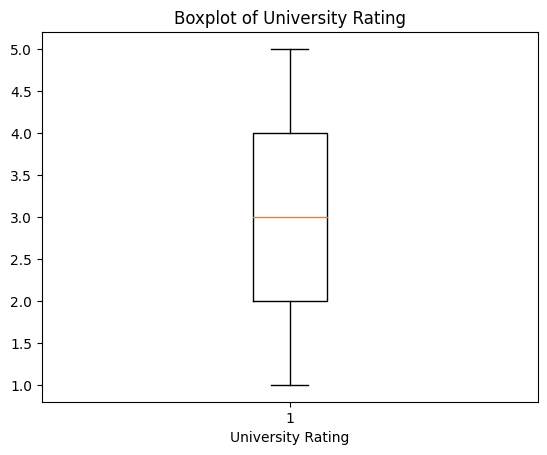

In [10]:
# Plot the boxplot of University Rating
plt.boxplot(data['University Rating'])
plt.xlabel('University Rating')
plt.title('Boxplot of University Rating')
plt.show()

In [11]:
print((data['University Rating']==1).sum())

26


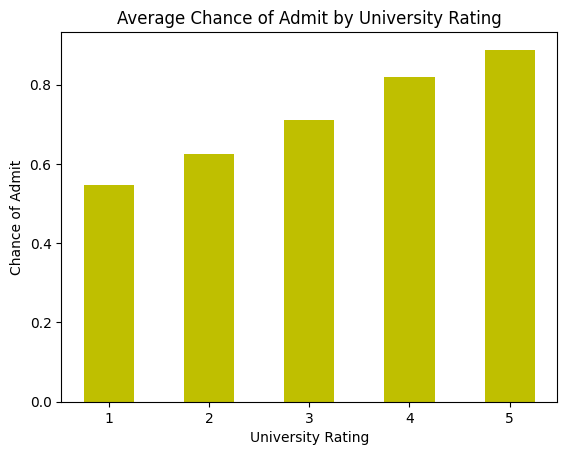

In [12]:
# Calculate the mean of Chance of Admit for each University Rating
rating_means = data.groupby('University Rating')['Chance of Admit '].mean()
fig, ax = plt.subplots()
ax.bar(rating_means.index, rating_means.values,width=0.5,color='y')
ax.set_title('Average Chance of Admit by University Rating')
ax.set_xlabel('University Rating')
ax.set_ylabel('Chance of Admit')
plt.show()

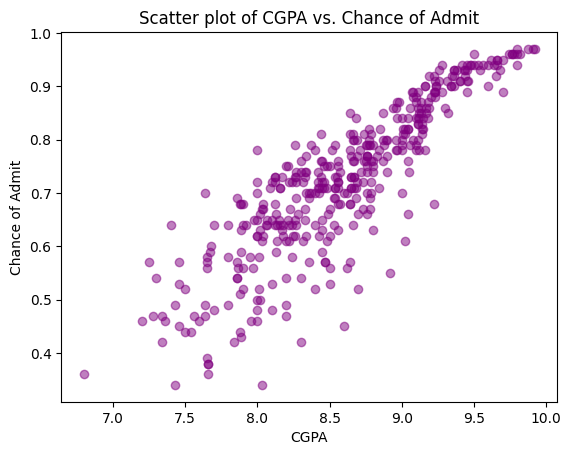

In [13]:
#Scatter plot for CGPA vs. Chance of Admit:
plt.scatter(data['CGPA'], data['Chance of Admit '], alpha=0.5, color='purple')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('Scatter plot of CGPA vs. Chance of Admit')
plt.show()

In [14]:
# Compute correlation
corr_matrix = data.corr()
print(corr_matrix['Chance of Admit '])

GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64


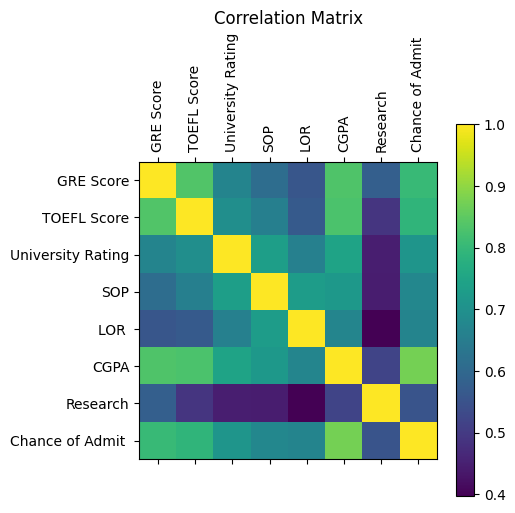

In [15]:
# Plot the correlation matrix
corr = data.corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

# Train-test split

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
#storing independent variable in X
X = data.drop('Chance of Admit ',axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [18]:
#storing response variable in Y
Y = data['Chance of Admit ']

In [19]:
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

# Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)

Y_pred = lin_reg.predict(X_test)
print("Coefficient : ",lin_reg.coef_)

print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))

print('R2 score: %.2f' % r2_score(Y_test, Y_pred))

Coefficient :  [ 0.02099652  0.01639522  0.00844812 -0.00029857  0.01413835  0.0673812
  0.01108222]
Mean Squared Error: 0.004617003377285013
R2 score: 0.82


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

#Coverting continuous data to binary data!
data['Admitted'] = data['Chance of Admit '] > 0.7
data['Admitted'] = data['Admitted'].astype(int)

X2 = data.drop(['Chance of Admit ', 'Admitted'], axis=1)
Y2 = data['Admitted']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

logreg = LogisticRegression()
logreg.fit(X2_train, Y2_train)

#predict
Y_pred_LGR = logreg.predict(X2_test)

accuracy_LGR = accuracy_score(Y2_test, Y_pred_LGR)
confusion_mat_LGR = confusion_matrix(Y2_test, Y_pred_LGR)
class_report = classification_report(Y2_test, Y_pred_LGR)

print("Coefficient : ",logreg.coef_)

print('Confusion Matrix:\n', confusion_mat_LGR)

Coefficient :  [[ 0.76869175  0.24954986  0.30657154 -0.04158485  0.47834104  1.21093663
   0.52558506]]
Confusion Matrix:
 [[29  4]
 [ 4 43]]


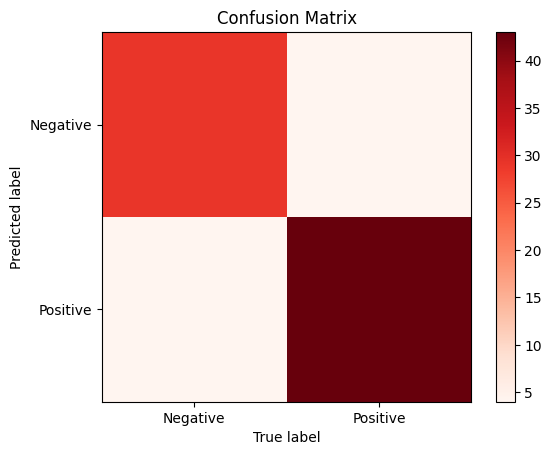

In [26]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    plt.colorbar()
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(confusion_mat_LGR)

In [27]:
precision_LGR, recall_LGR, fscore_LGR, support_LGR = precision_recall_fscore_support(Y2_test, Y_pred_LGR,average='binary')
print('Accuracy:', accuracy_LGR)
print('Precision:', precision_LGR)
print('Recall:', recall_LGR)

Accuracy: 0.9
Precision: 0.9148936170212766
Recall: 0.9148936170212766


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
# Defining the KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X2_train, Y2_train)

# Predicting on the test set
Y_pred_KNN = knn.predict(X2_test)

# Evaluating the model
accuracy_KNN = accuracy_score(Y2_test, Y_pred_KNN)
confusion_mat_KNN = confusion_matrix(Y2_test, Y_pred_KNN)
class_report = classification_report(Y2_test, Y_pred_KNN)
print(confusion_mat_KNN)

[[27  6]
 [ 7 40]]


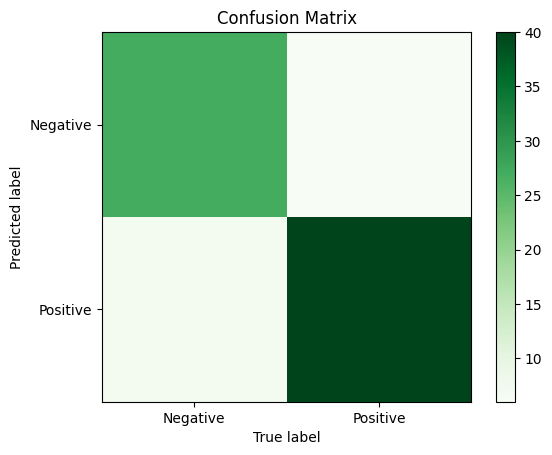

In [29]:
def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.colorbar()
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
plot_confusion_matrix(confusion_mat_KNN)

In [30]:
precision_KNN, recall_KNN, fscore_KNN, support_KNN = precision_recall_fscore_support(Y2_test, Y_pred_KNN,average='binary')
print('Accuracy:', accuracy_KNN)
print('Precision:', precision_KNN)
print('Recall:', recall_KNN)

Accuracy: 0.8375
Precision: 0.8695652173913043
Recall: 0.851063829787234
